# Analysing Egyptian Data of Food Prices

**By Ahmed Khaled**

In this notebook, we look forward to answering the following questions based on the provided data:

1. What are the overall average prices for each product ?
1. What are the monthly-averaged prices of each product at each year ?
1. What are the yearly-averaged prices of each product at each month ?
1. In which year the largest average price rise/fall happened for each product?

## 0. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Cleaning

### 1.1. Data Reading

In [2]:
food_data = pd.read_csv("food-data.csv")
food_data.head()

,date,category,commodity,unit,price
0,15-08-10,cereals and tubers,Potatoes,KG,1.81
1,15-08-10,cereals and tubers,Rice,KG,3.98
2,15-08-10,cereals and tubers,Wheat flour,KG,3.44
3,15-08-10,"meat, fish and eggs",Meat (beef),KG,50.22
4,15-08-10,"meat, fish and eggs","Meat (chicken, frozen)",KG,17.00


In [3]:
food_data.describe(include="all")

,date,category,commodity,unit,price
count,1893,1893,1893,1893,1893.000000
unique,136,7,24,5,NaN
top,15-12-15,oil and fats,Potatoes,KG,NaN
freq,19,440,136,1457,NaN
mean,NaN,NaN,NaN,NaN,21.391712
std,NaN,NaN,NaN,NaN,29.080559
min,NaN,NaN,NaN,NaN,0.660000
25%,NaN,NaN,NaN,NaN,5.450000
50%,NaN,NaN,NaN,NaN,11.650000
75%,NaN,NaN,NaN,NaN,23.750000


In [4]:
food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1893 non-null   object 
 1   category   1893 non-null   object 
 2   commodity  1893 non-null   object 
 3   unit       1893 non-null   object 
 4   price      1893 non-null   float64
dtypes: float64(1), object(4)
memory usage: 74.1+ KB


### 1.2. Date Conversion

We need to convert the `date` column to `datetime` object.

In [5]:
food_data['date'] = pd.to_datetime(food_data['date'], format = "%d-%m-%y")

In [6]:
food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1893 non-null   datetime64[ns]
 1   category   1893 non-null   object        
 2   commodity  1893 non-null   object        
 3   unit       1893 non-null   object        
 4   price      1893 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 74.1+ KB


In [7]:
food_data.head()

,date,category,commodity,unit,price
0,2010-08-15,cereals and tubers,Potatoes,KG,1.81
1,2010-08-15,cereals and tubers,Rice,KG,3.98
2,2010-08-15,cereals and tubers,Wheat flour,KG,3.44
3,2010-08-15,"meat, fish and eggs",Meat (beef),KG,50.22
4,2010-08-15,"meat, fish and eggs","Meat (chicken, frozen)",KG,17.00


### 1.3. Renaming Categories Properly

We are going to list all unique values of the `category` and `commodity`. Check if the names are meaningful and if not, change them.

In [8]:
for col in ['category', 'commodity']:
    print(f"For {col}")
    for value in food_data[col].unique():
        print(f"{value}, ", end = "")
    print()

For category
cereals and tubers, meat, fish and eggs, miscellaneous food, oil and fats, pulses and nuts, vegetables and fruits, milk and dairy, 
For commodity
Potatoes, Rice, Wheat flour, Meat (beef), Meat (chicken, frozen), Sugar, Ghee (artificial), Ghee (natural), Oil (maize), Beans (fava, dry), Garlic, Onions (white), Tomatoes, Lentils, Onions (red), Pasta, Eggs, Oil (sunflower), Fish (tilapia), Meat (beef, without bones), Cheese, Cheese (picon), Milk, Oil (mixed), 


`Category` column combines the `Commodity` values into subgroups. As we want to study each product on its own, we should go with the `Commodity` column. However, some of its value can be renamed more clearly. Also, we can combine some commodities that are really similar together to reduce the number of classes for better visualizations.

In [9]:
food_data['commodity'] = food_data['commodity'].replace({
    "Meat (beef)": "Beef",
    "Meat (chicken, frozen)": "Chicken",
    "Ghee (artificial)": "Artificial Ghee",
    "Ghee (natural)": "Natural Ghee",
    "Oil (maize)": "Maize Oil",
    "Beans (fava, dry)": "Beans",
    "Onions (white)": "White Onions",
    "Onions (red)": "Red Onions",
    "Oil (sunflower)": "Sunflower Oil",
    "Fish (tilapia)": "Fish",
    "Meat (beef, without bones)": "Boneless Beef",
    "Cheese (picon)": "Picon Cheese",
    "Oil (mixed)": "Mixed Oil"
})

In [10]:
len(food_data['commodity'].unique())

24

We are going to drop the `category` as we won't need it later...

In [11]:
food_data.drop(columns=['category'], inplace=True)

### 1.4. Check Products' Units

In [12]:
for commodity in food_data.commodity.unique():
    subdata = food_data[food_data.commodity == commodity]
    print(f"For {commodity} we have ")
    for unit in subdata.unit.unique():
        print(f" {unit} ", end = "")
    print()

For Potatoes we have 
 KG 
For Rice we have 
 KG 
For Wheat flour we have 
 KG 
For Beef we have 
 KG 
For Chicken we have 
 KG 
For Sugar we have 
 KG 
For Artificial Ghee we have 
 KG 
For Natural Ghee we have 
 KG 
For Maize Oil we have 
 800 G 
For Beans we have 
 KG 
For Garlic we have 
 KG 
For White Onions we have 
 KG 
For Tomatoes we have 
 KG 
For Lentils we have 
 KG 
For Red Onions we have 
 KG 
For Pasta we have 
 KG 
For Eggs we have 
 Unit 
For Sunflower Oil we have 
 800 G 
For Fish we have 
 KG 
For Boneless Beef we have 
 KG 
For Cheese we have 
 KG 
For Picon Cheese we have 
 168 G 
For Milk we have 
 L 
For Mixed Oil we have 
 L 


We have 2 products with different units; oil and cheese. And we have milk, eggs, oil with units rather than KG which is the dominant unit in the data. So for better visualizations, we can discard those whose unit isn't KG and unify the units for KG.

> Cheese (168 G / KG) : we can multiply by 1000/168 for those with 168 G as their unit.


In [13]:
# Convert the price of the of `168 G` to `KG` by multiplying by 1000/168

food_data.loc[(food_data.unit == "168 G"), 'price'] = food_data.loc[(food_data.unit == "168 G"), 'price'] * 1000 / 168
food_data.loc[(food_data.unit == "168 G"), 'unit'] = 'KG'

# Convert the price of the `800 G` to `KG` by multiplying by 1000/800

food_data.loc[(food_data.unit == "800 G"), 'price'] = food_data.loc[(food_data.unit == "800 G"), 'price'] * 1000 / 800
food_data.loc[(food_data.unit == "800 G"), 'unit'] = 'KG'

In [14]:
food_data.unit.unique()

array(['KG', 'Unit', 'L'], dtype=object)

In [20]:
commodity_units = dict()
for commodity in food_data.commodity.unique():
    subdata = food_data[food_data.commodity == commodity]
    print(f"For {commodity} we have ")
    for unit in subdata.unit.unique():
        print(f" {unit} ", end = "")
    print()
    if len(subdata.unit.unique()) == 1:
        commodity_units[commodity] = subdata.unit.unique()[0]
        
print(commodity_units)

For Potatoes we have 
 KG 
For Rice we have 
 KG 
For Wheat flour we have 
 KG 
For Beef we have 
 KG 
For Chicken we have 
 KG 
For Sugar we have 
 KG 
For Artificial Ghee we have 
 KG 
For Natural Ghee we have 
 KG 
For Maize Oil we have 
 KG 
For Beans we have 
 KG 
For Garlic we have 
 KG 
For White Onions we have 
 KG 
For Tomatoes we have 
 KG 
For Lentils we have 
 KG 
For Red Onions we have 
 KG 
For Pasta we have 
 KG 
For Eggs we have 
 Unit 
For Sunflower Oil we have 
 KG 
For Fish we have 
 KG 
For Boneless Beef we have 
 KG 
For Cheese we have 
 KG 
For Picon Cheese we have 
 KG 
For Milk we have 
 L 
For Mixed Oil we have 
 L 
{'Potatoes': 'KG', 'Rice': 'KG', 'Wheat flour': 'KG', 'Beef': 'KG', 'Chicken': 'KG', 'Sugar': 'KG', 'Artificial Ghee': 'KG', 'Natural Ghee': 'KG', 'Maize Oil': 'KG', 'Beans': 'KG', 'Garlic': 'KG', 'White Onions': 'KG', 'Tomatoes': 'KG', 'Lentils': 'KG', 'Red Onions': 'KG', 'Pasta': 'KG', 'Eggs': 'Unit', 'Sunflower Oil': 'KG', 'Fish': 'KG', 'Boneless

## 3. Data Visualization

### 3.1. What are the products with the highest averaging prices ?

In [19]:
food_data_prices_average = food_data.groupby(by='commodity').agg({"price": [np.mean, np.std]}).reset_index()
food_data_prices_average.columns = ["commodity", "avg_price", "std_price"]
food_data_prices_average_sorted = food_data_prices_average.sort_values(by="avg_price").reset_index()

In [23]:
# assign the unit column
food_data_prices_average_sorted['unit'] = food_data_prices_average_sorted.apply(lambda row: commodity_units[row.commodity], axis = 1)

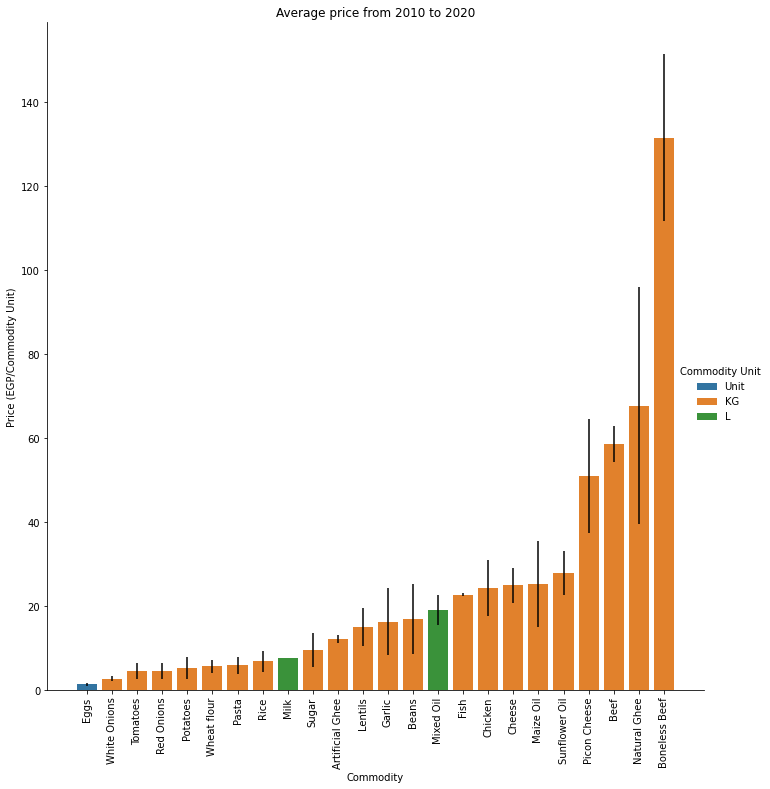

In [32]:
g = sns.catplot(
    data = food_data_prices_average_sorted,
    x = "commodity",
    y = "avg_price",
    kind = "bar",
    height = 10,
    color="b",
    hue = "unit",
    palette = "tab10",
    dodge = False
)
g._legend.set_title("Commodity Unit")

# plot error bars for each commodity
for index, row in food_data_prices_average_sorted.iterrows():
    plt.vlines(x=index, ymin=row['avg_price'] - row['std_price'], ymax=row['avg_price'] + row['std_price'], color="black")
plt.ylabel("Price (EGP/Commodity Unit)")
plt.xlabel("Commodity")
plt.title("Average price from 2010 to 2020")
plt.xticks(rotation=90);

### Here, we can see that Beef, Ghee, and Oils were the products with highest average prices. Cheese and Chicken not so far behind.

### For each product, what were the average prices for each year ?

In [42]:
food_data.head(1)

,date,commodity,unit,price
0,2010-08-15,Potatoes,KG,1.81


In [43]:
food_data.tail(1)

,date,commodity,unit,price
1892,2021-12-15,Tomatoes,KG,4.11


The data contains each month from 2010 to 2021. We will create a column with the year of the date and aggregate the price at each year.

In [44]:
food_data_year = food_data.copy()

food_data_year['year'] = food_data_year.apply(lambda row: row['date'].year, axis = 1)
food_data_year['month'] = food_data_year.apply(lambda row: row['date'].month, axis = 1)
food_data_year['day'] = food_data_year.apply(lambda row: row['date'].day, axis = 1)

In [45]:
commodity_year = food_data_year.groupby(by=["year", "month", "commodity"]).agg({"price": np.mean}).reset_index()

In [53]:
commodity_year["highlight"] = commodity_year.apply(lambda row: 'yes' if row['commodity'] in ["Natural Ghee", "Picon Cheese", "Boneless Beef"] else 'no', axis = 1)

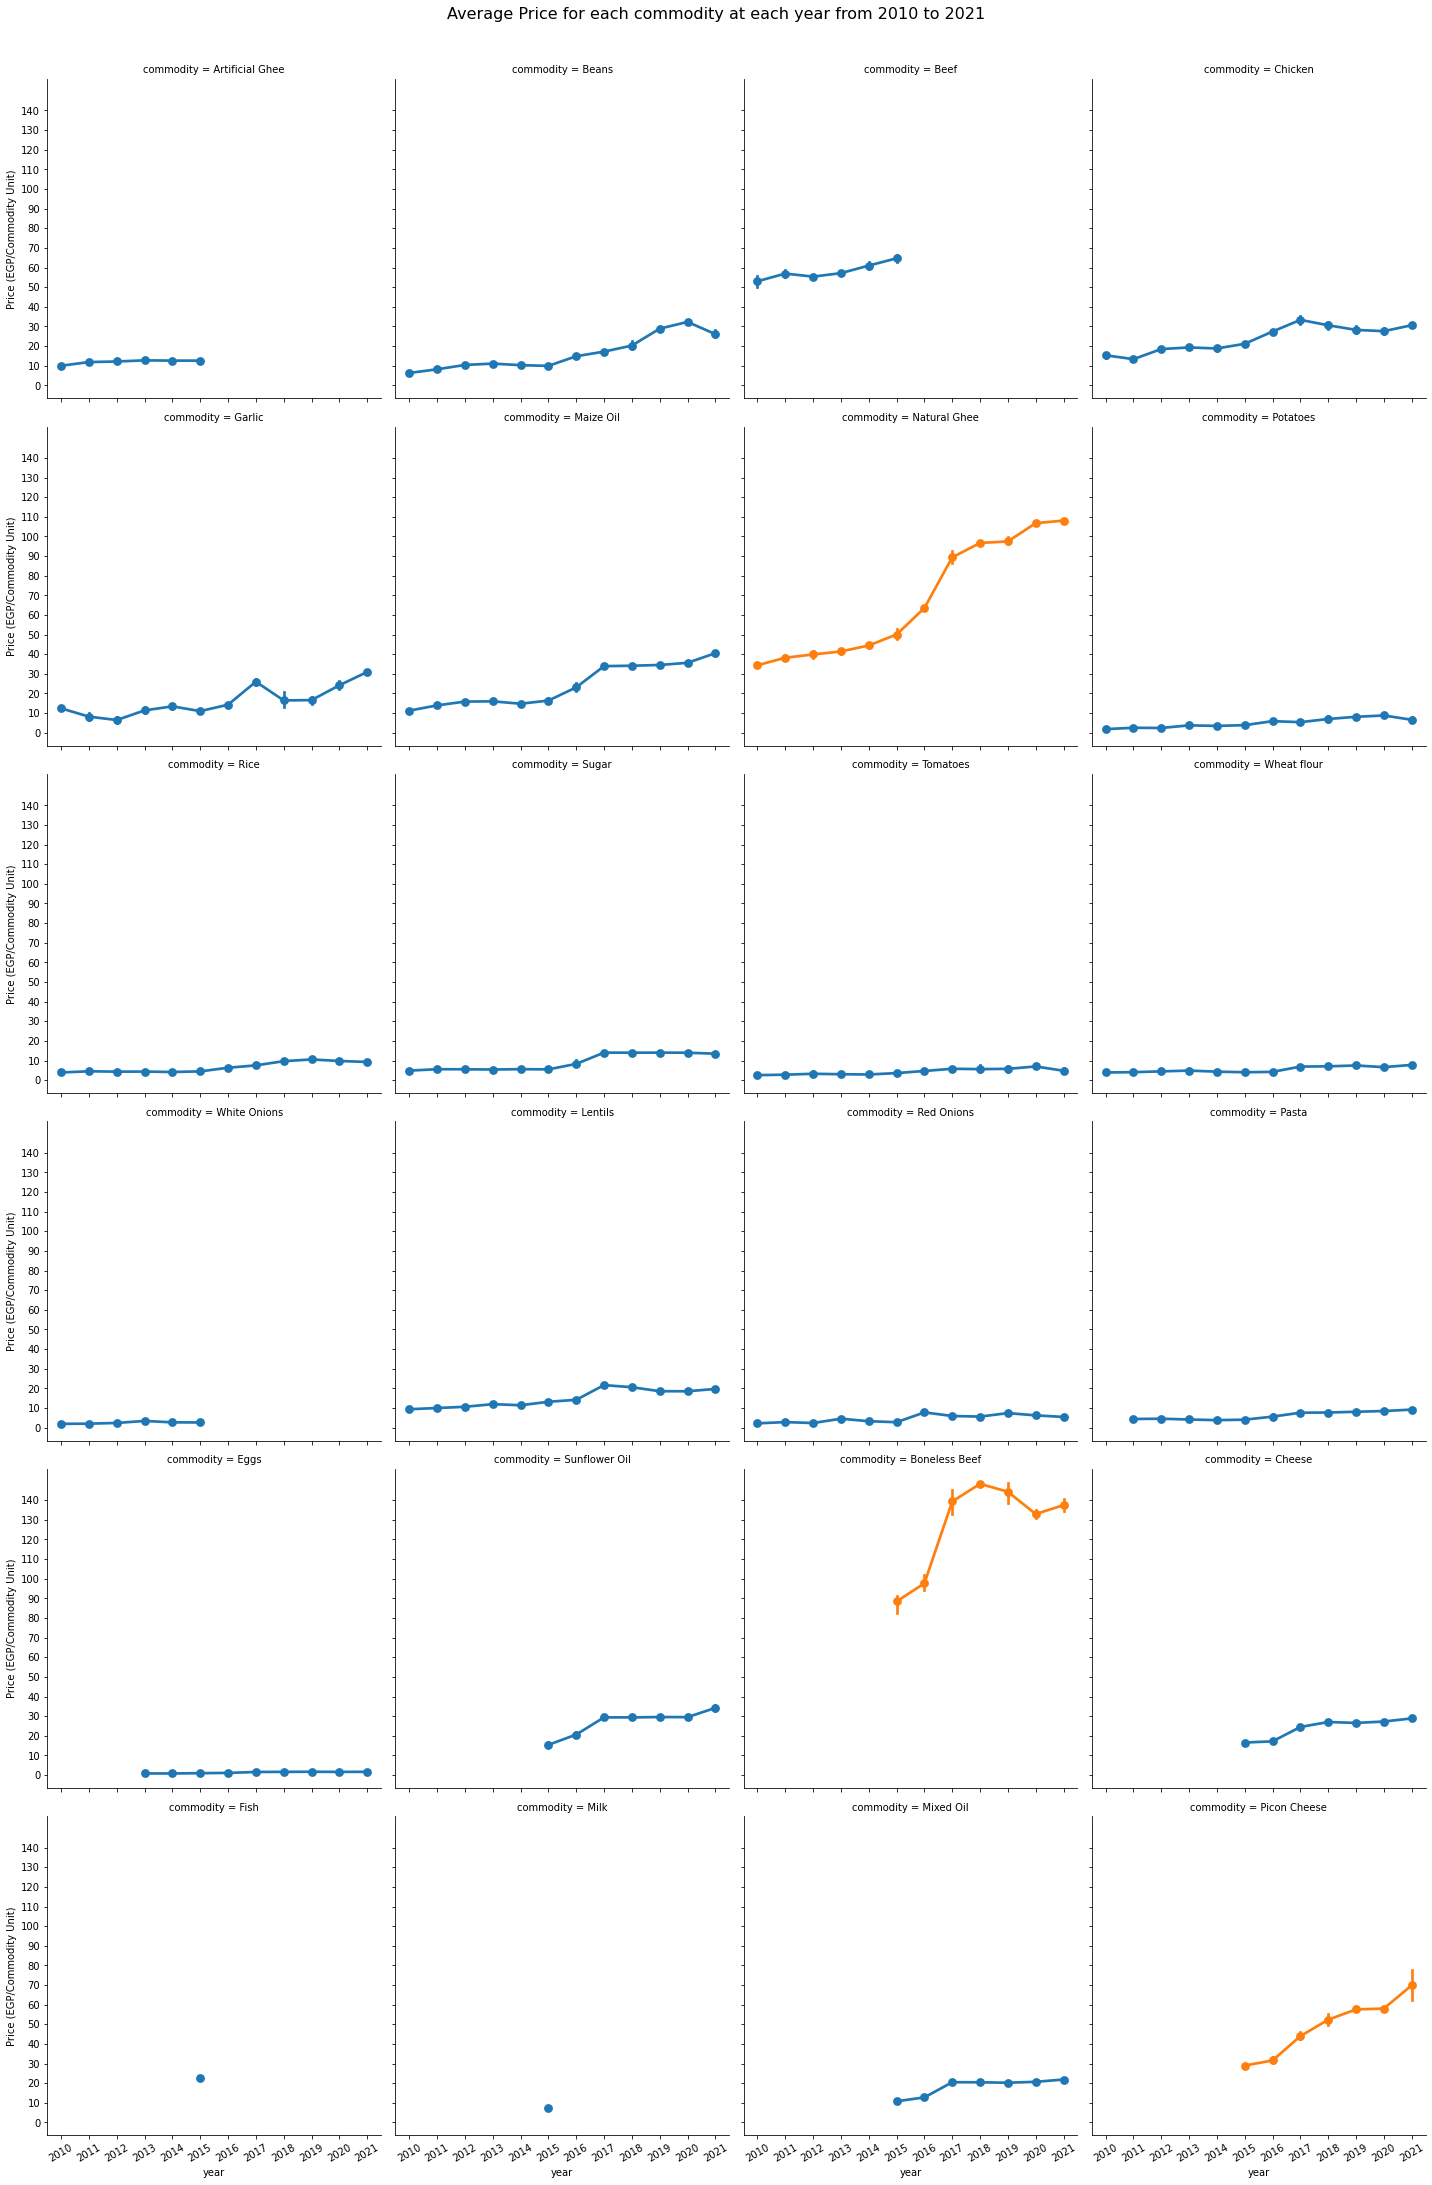

In [58]:
g = sns.catplot(
    data = commodity_year,
    x = 'year',
    y = 'price',
    col = 'commodity',
    col_wrap = 4,
    kind = "point",
    hue = "highlight",
    legend = False
)

for ax in g.axes:
    ax.set_ylabel("Price (EGP/Commodity Unit)")
    ax.set_xticklabels(range(2010, 2021+1), rotation=30)
    ax.set_yticks(range(0, 140+5, 10))
    
g.fig.suptitle("Average Price for each commodity at each year from 2010 to 2021", fontsize=16,  y=1.01)
g.fig.tight_layout();

### Among the dataset, yearly-averaged prices for product *decreased* only once for 3 products; Beans(2020-2021), Garlic(2017-2018), and Boneless Beef (2018-2019).

### The products that clearly their yearly-averaged prices increased over time, highlighted in orange,  were Natural Ghee, Bonelees Beef (with the except of 2019), and Picon Cheese.

### For each product, what were the average prices at each month ?

In [169]:
commodity_year['highlight_month'] = commodity_year.apply(lambda row: 'yes' if row['commodity'] in ["Natural Ghee", "Picon Cheese", "Boneless Beef"] else 'no', axis = 1)

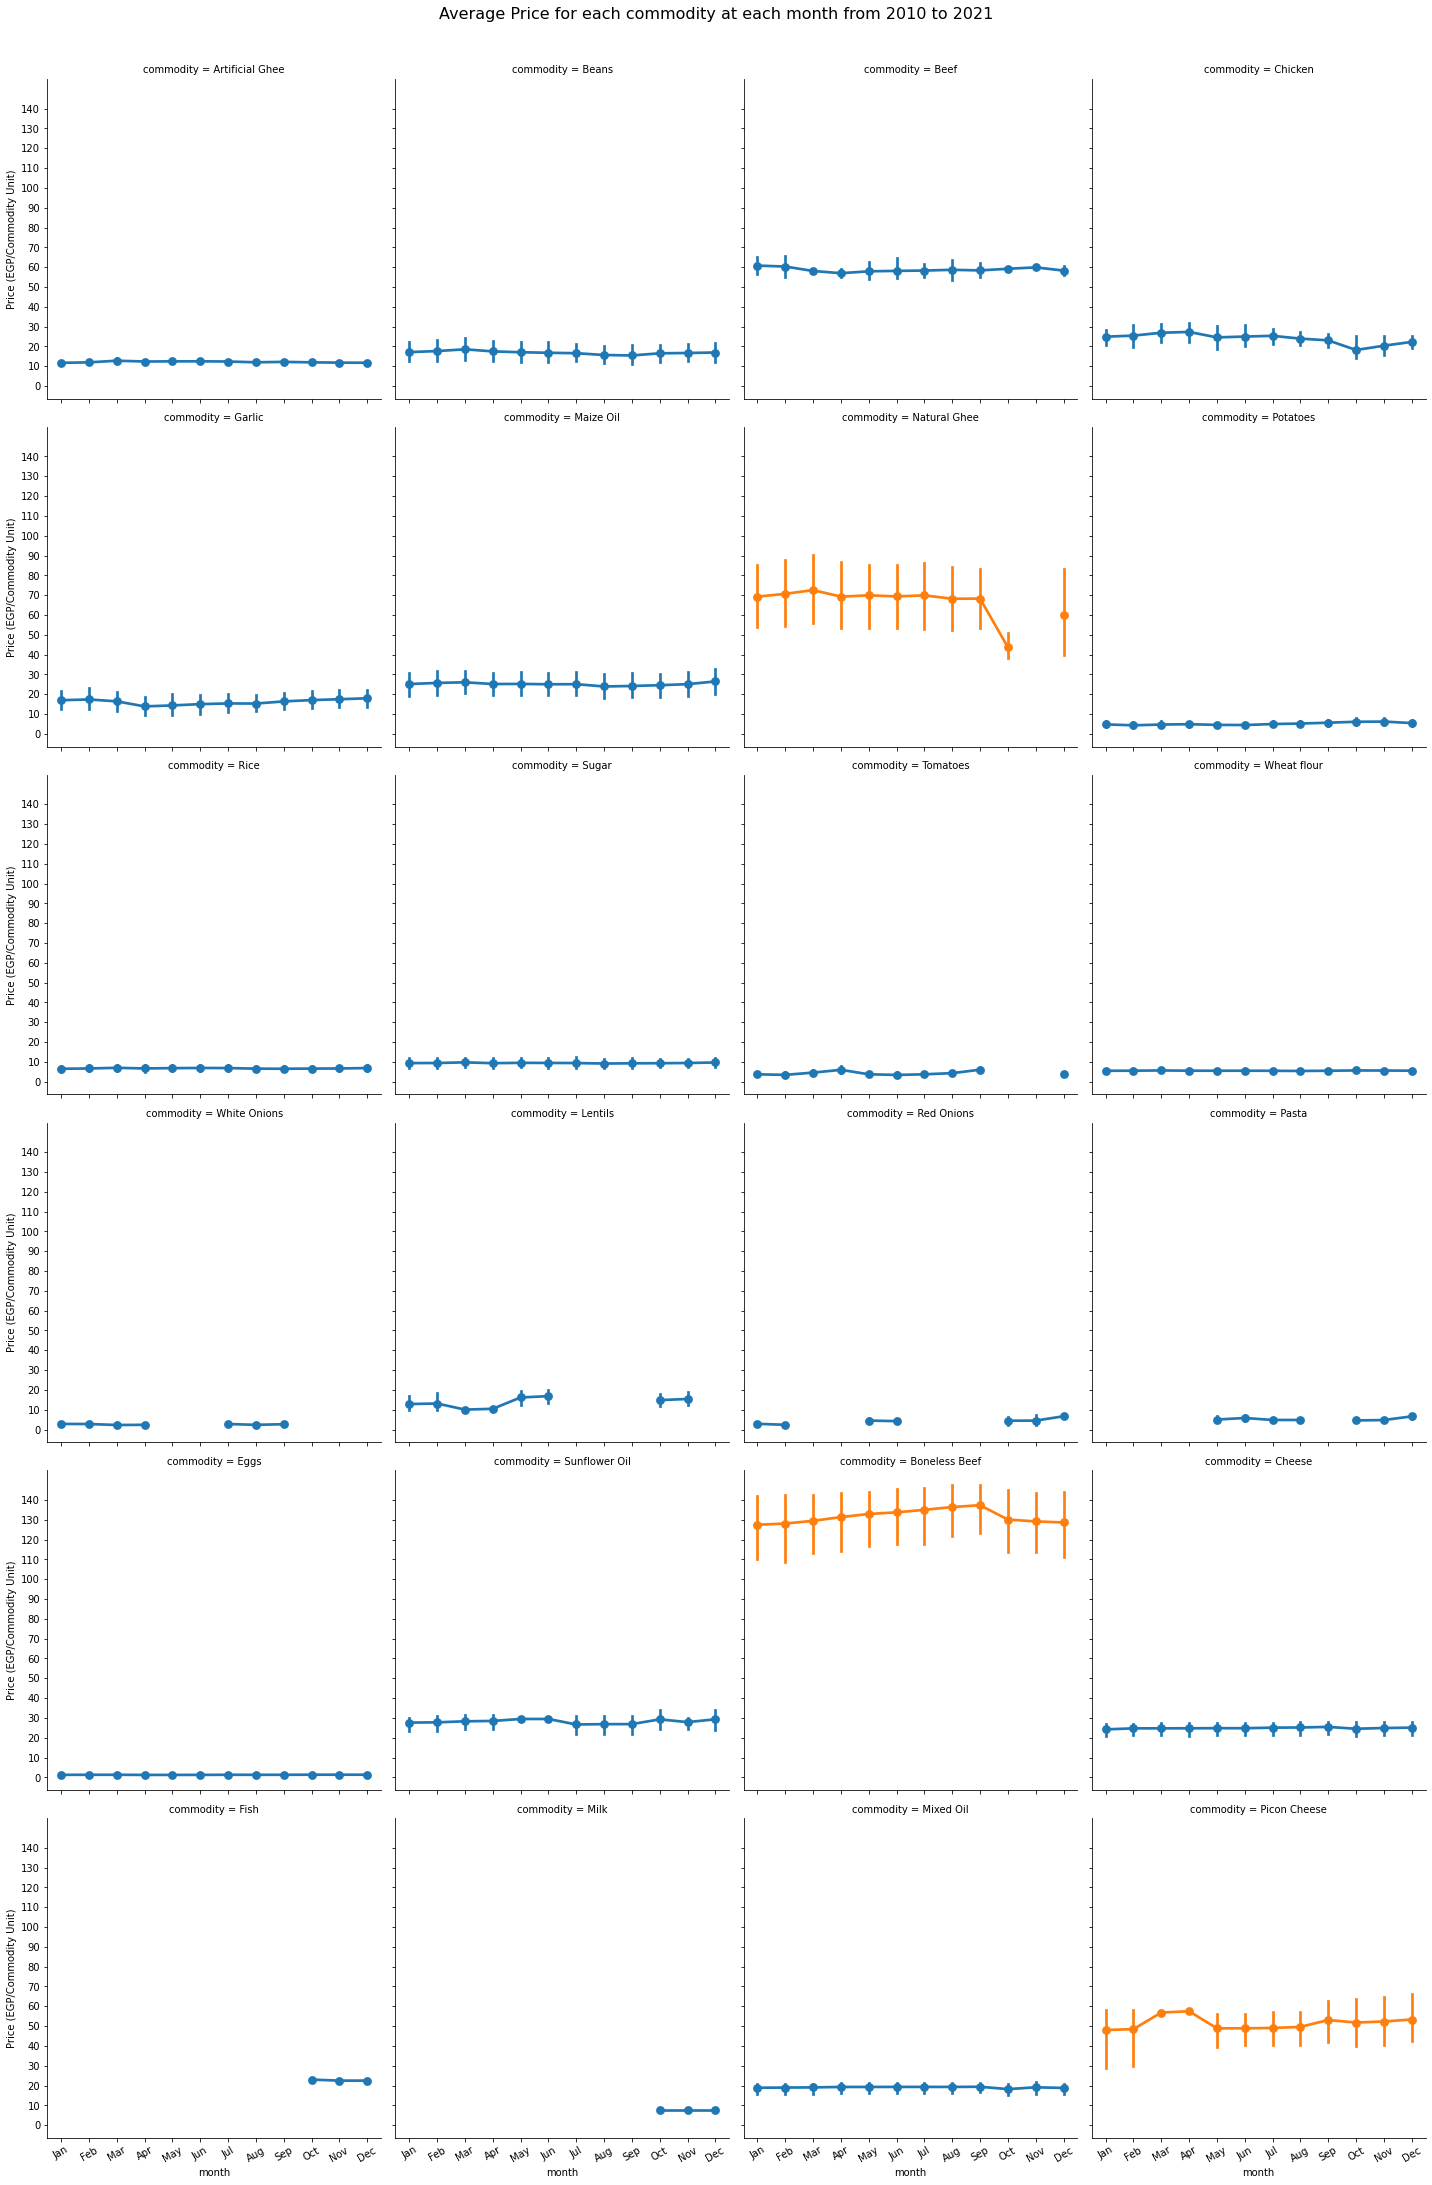

In [170]:
g = sns.catplot(
    data = commodity_year,
    x = 'month',
    y = 'price',
    col = 'commodity',
    col_wrap = 4,
    kind = "point",
    hue = "highlight_month",
    legend = False
)

for ax in g.axes:
    ax.set_ylabel("Price (EGP/Commodity Unit)")
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=30)
    ax.set_yticks(range(0, 140+10, 10))
    
g.fig.suptitle("Average Price for each commodity at each month from 2010 to 2021", fontsize=16,  y=1.01)
g.fig.tight_layout();

### We can see that nearly all products have the same average price over all months. We can notice a non-small rise/fall in the case of Picon Cheese, Boneless Beef, and Natural Ghee (highlighted in orange).

### In which year the largest average price rise/fall happened for each product?

We are going to calculate the largest rise and fall of price for each product,

In [160]:
price_rises = dict()

for commodity in food_data.commodity.unique():
    commodity_subdata = food_data[food_data.commodity == commodity]
    if commodity_subdata.shape[0] == 1:
        continue # skip which has only one price
    last_price = commodity_subdata.loc[[commodity_subdata.index[0]], ["price"]].values[0][0]
    for index, row in commodity_subdata.iterrows():
        if index == 0:
            continue
        current_price = row["price"]
        rise = current_price - last_price
        if price_rises.get(commodity) is None:
            price_rises[commodity] = [rise, row['date']]
        elif rise > price_rises[commodity][0] and rise > 1:
            price_rises[commodity] = [rise, row['date']]
        last_price = row["price"]
        

In [161]:
rises_df = pd.DataFrame(price_rises).transpose()
rises_df.reset_index(inplace=True)
rises_df.columns = ["Commodity", "Rise", "Date"]
rises_df["year"] = rises_df.apply(lambda row: row["Date"].year, axis = 1)
rises_df["unit"] = rises_df.apply(lambda row: commodity_units[row["Commodity"]], axis = 1)
rises_df.drop(index=(rises_df[rises_df.Rise == 0]).index, inplace=True)
rises_df

,Commodity,Rise,Date,year,unit
0,Potatoes,2.6,2015-10-15,2015,KG
1,Rice,1.51,2015-10-15,2015,KG
2,Wheat flour,1.55,2013-10-15,2013,KG
3,Beef,6.63,2014-07-15,2014,KG
4,Chicken,7.29,2019-05-15,2019,KG
5,Sugar,3.0,2016-11-15,2016,KG
6,Artificial Ghee,2.0,2012-03-15,2012,KG
7,Natural Ghee,19.57,2017-01-15,2017,KG
8,Maize Oil,3.75,2016-11-15,2016,KG
9,Beans,5.5,2016-10-15,2016,KG


In [162]:
from datetime import datetime, timedelta # to adjust annotations

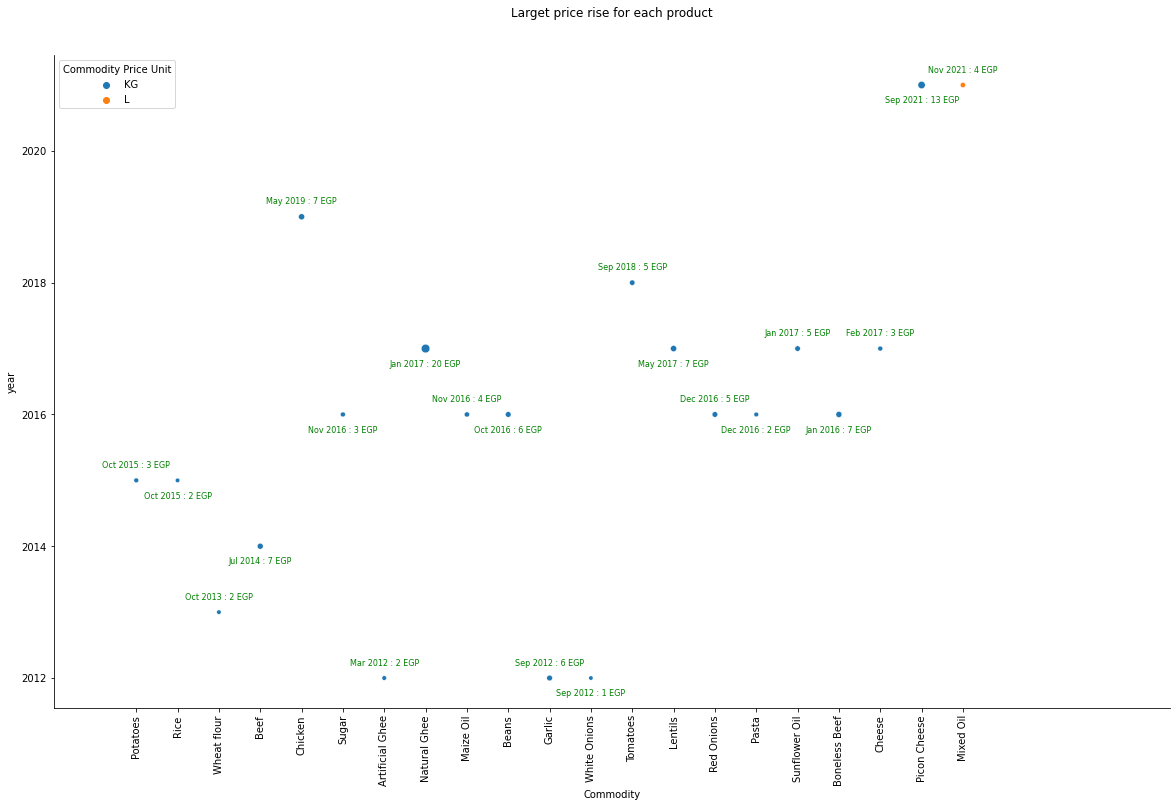

In [164]:
plt.figure(figsize=(20, 12))
g = sns.scatterplot(
    data = rises_df,
    x = "Commodity",
    y = "year",
    size = "Rise",
    hue = "unit",
)

for i, (index, row) in enumerate(rises_df.iterrows()):
    commodity = row["Commodity"]
    date = row['Date']
    year = row["year"]
    rise = row['Rise']
    if i % 2 == 0:
        xy = (commodity, year + 0.3)
        align = "top"
    else:
        xy = (commodity, year - 0.3)
        align = "bottom"
    plt.annotate(f"{date.strftime('%b %Y')} : {round(rise)} EGP", xy=xy, ha = "center", va=align, size = 8, color = "green")
    
h,l = g.get_legend_handles_labels()
plt.legend(h[1:3], l[1:3], loc = "upper left", title = "Commodity Price Unit")
plt.xlabel("Commodity")
sns.despine()
plt.xlim(-2, 25)
plt.xticks(rotation = 90)
plt.title("Larget price rise for each product", y=1.05);

### We can see that the latest price rise occured for Mixed Oil. The largest were for Natural Ghee and Picon Cheese.

In [165]:
price_falls = dict()

for commodity in food_data.commodity.unique():
    commodity_subdata = food_data[food_data.commodity == commodity]
    if commodity_subdata.shape[0] == 1:
        continue # skip which has only one price
    last_price = commodity_subdata.loc[[commodity_subdata.index[0]], ["price"]].values[0][0]
    for index, row in commodity_subdata.iterrows():
        if index == 0:
            continue
        current_price = row["price"]
        fall = current_price - last_price
        if price_falls.get(commodity) is None:
            price_falls[commodity] = [fall, row['date']]
        elif fall < price_falls[commodity][0] and fall < -1:
            price_falls[commodity] = [fall, row['date']]
        last_price = row["price"]
        

In [173]:
falls_df = pd.DataFrame(price_falls).transpose()
falls_df.reset_index(inplace=True)
falls_df.columns = ["Commodity", "fall", "Date"]
falls_df["year"] = falls_df.apply(lambda row: row["Date"].year, axis = 1)
falls_df["unit"] = falls_df.apply(lambda row: commodity_units[row["Commodity"]], axis = 1)
falls_df["negative fall"] = falls_df.loc[:, ["fall"]] * -1 # for visualization size propely
falls_df.drop(index=(falls_df[falls_df.fall == 0]).index, inplace=True)
falls_df

,Commodity,fall,Date,year,unit,negative fall
0,Potatoes,-3.95,2021-02-15,2021,KG,3.95
1,Rice,-1.26,2013-12-15,2013,KG,1.26
2,Wheat flour,-1.36,2013-12-15,2013,KG,1.36
3,Beef,-6.3,2015-09-15,2015,KG,6.3
4,Chicken,-4.0,2017-12-15,2017,KG,4.0
5,Sugar,-2.44,2021-11-15,2021,KG,2.44
6,Artificial Ghee,-2.53,2013-04-15,2013,KG,2.53
7,Natural Ghee,-10.25,2012-06-15,2012,KG,10.25
8,Maize Oil,-2.0,2012-11-15,2012,KG,2.0
9,Beans,-5.0,2016-09-15,2016,KG,5.0


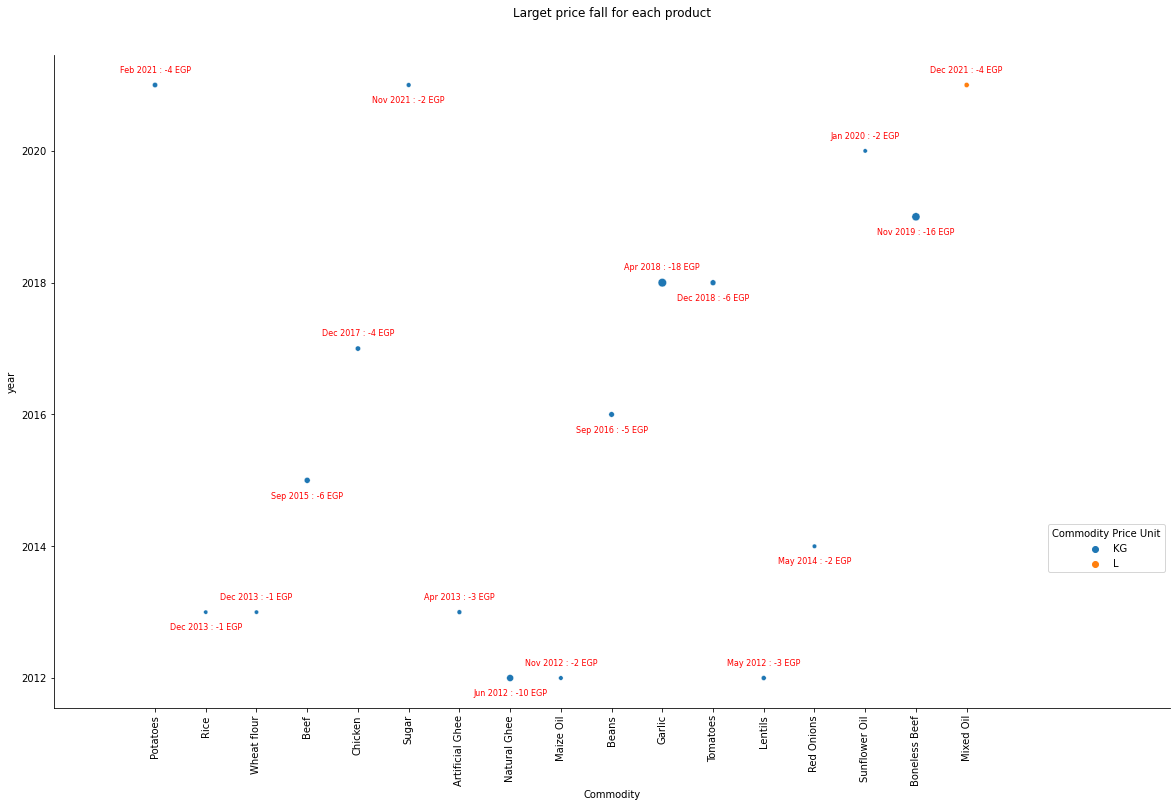

In [175]:
plt.figure(figsize=(20, 12))
g = sns.scatterplot(
    data = falls_df,
    x = "Commodity",
    y = "year",
    size = "negative fall",
    hue = "unit",
)

for i, (index, row) in enumerate(falls_df.iterrows()):
    commodity = row["Commodity"]
    date = row['Date']
    year = row["year"]
    fall = row['fall']
    if i % 2 == 0:
        xy = (commodity, year + 0.3)
        align = "top"
    else:
        xy = (commodity, year - 0.3)
        align = "bottom"
    plt.annotate(f"{date.strftime('%b %Y')} : {round(fall)} EGP", xy=xy, ha = "center", va=align, size = 8, color = "red")
    
h,l = g.get_legend_handles_labels()
plt.legend(h[1:3], l[1:3], loc = "lower right", bbox_to_anchor = (1.0, 0.2),  title = "Commodity Price Unit")
plt.xlabel("Commodity")
sns.despine()
plt.xlim(-2, 20)
plt.xticks(rotation = 90)
plt.title("Larget price fall for each product", y=1.05);

### We can see that the latest price falls occured for Mixed Oil and Potatoes. The largest falls were for Garilc and Boneless Beef.